Populating the interactive namespace from numpy and matplotlib


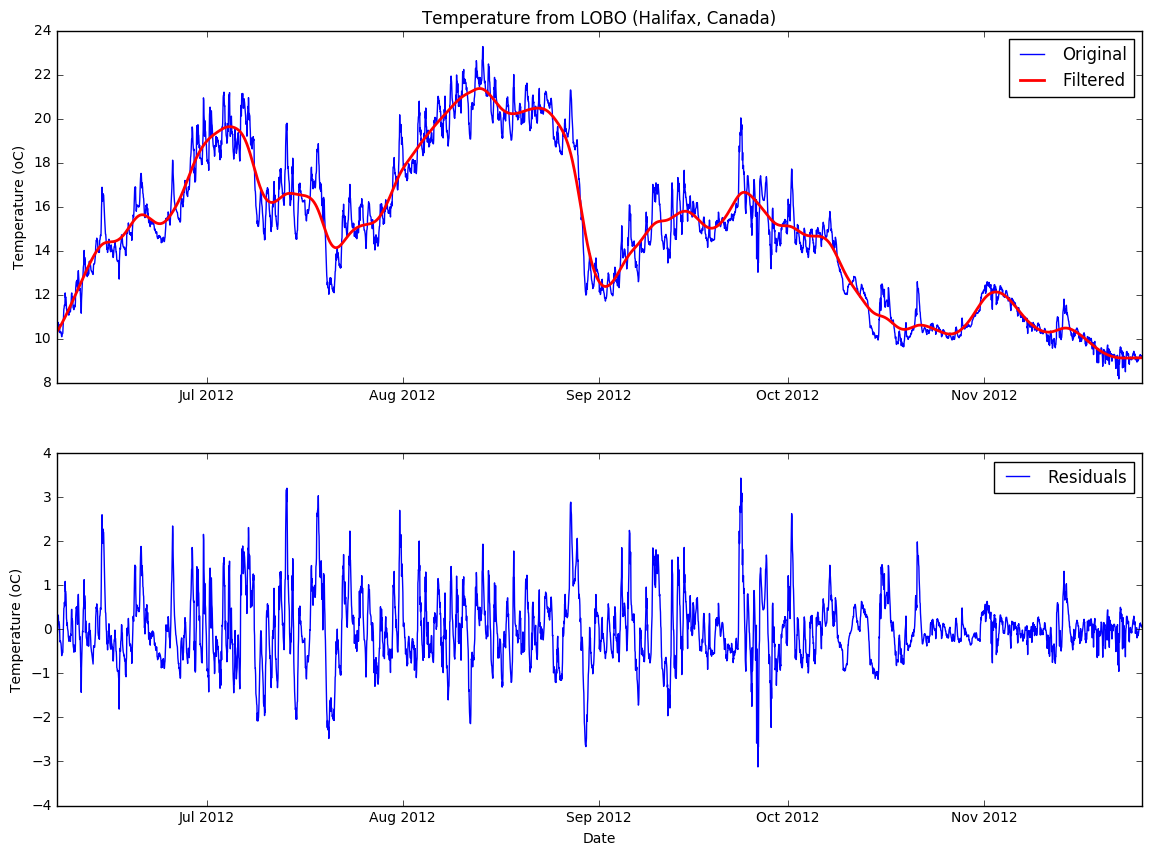

In [10]:
# Apply a low-pass filter to temperature from the Satlantic LOBO ocean observatory
# moored in the North West Arm (Halifax, Nova Scotia, Canada).
# Ref: https://oceanpython.org


##### First, we download temperature data from the LOBO buoy.
%pylab inline
import urllib2
import StringIO
import csv
import numpy as np
from datetime import datetime
 
import warnings
warnings.simplefilter('ignore',DeprecationWarning);


startdate = '20111118'
enddate   = '20121125'
 
# Read data from LOBO buoy
response = urllib2.urlopen('http://lobo.satlantic.com/cgi-data/nph-data.cgi?min_date='
                           +startdate+'&max_date='+enddate+'&y=temperature')
 
data = StringIO.StringIO(response.read())
 
r = csv.DictReader(data,
                   dialect=csv.Sniffer().sniff(data.read(1000)))
data.seek(0)
 
# Break the file into two lists
date, temp = [],[]
date, temp = zip(*[(datetime.strptime(x['date [AST]'], "%Y-%m-%d %H:%M:%S"), \
                 x['temperature [C]']) for x in r if x['temperature [C]'] is not None])
 
# temp needs to be converted from a "list" into a numpy array...
temp = np.array(temp)
temp = temp.astype(np.float) #...of floats

##### Then we proceed to design and apply the filter and make the plots

import scipy.signal as signal
import matplotlib.pyplot as plt
 
# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.01 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
tempf = signal.filtfilt(B,A, temp)

# Make plots
pylab.figure(figsize=(14, 10));
pylab.subplot(2,1,1)
pylab.plot(date,temp, 'b-')
pylab.plot(date,tempf, 'r-',linewidth=2)
pylab.ylabel("Temperature (oC)")
pylab.legend(['Original','Filtered'])
pylab.title("Temperature from LOBO (Halifax, Canada)")

pylab.subplot(2,1,2)
pylab.plot(date,temp-tempf, 'b-')
pylab.ylabel("Temperature (oC)")
pylab.xlabel("Date")
pylab.legend(['Residuals'])